# Метрики качества моделей

- Снижение loss в процессе обучения (и что важнее - в процессе валидации) - показатель того что модель учится
- Accuracy (корректность) - базовая метрика точности пердсказаний обученной модели: **Acc = correct predictions / total predictions**

## 1. Бинарная классификация
Базовый случай для всех метрик - разделение на два класса, появляется 4 исхода для результатов классификации:
- True Positive (TP)
- True Negative (TN)
- False Positive (FP) или т.н. ошибка 1-го рода
- False Negative (FN) или т.н. ошибка 2-го рода

### [Матрица ошибок](https://en.wikipedia.org/wiki/Confusion_matrix) (confusion matrix)
Строится по результатам бинарной классификации (подсчет всех исходов - TP, TN, FP и FN). Cама по себе не является метрикой, это отправная точка анализа и вычисления метрик:

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_confusion_matrix.png" width=600>


In [10]:
import numpy as np

# 3 класса: 0, 1, 2
# results = [[y_true, y_pred],...] - пары истринных и предсказанных значений

results_3x3 = np.array([
    [0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[1,1],[1,1],[1,0],
    [0,1],[1,1],[0,0],[0,1],[0,0],[0,1],[2,1],[1,0],[1,0],[1,1],[1,1]
])

results_3x3

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [2, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1]])

Функция [np.histogramdd](https://numpy.org/devdocs/reference/generated/numpy.histogramdd.html) позволяет построить многомерную гисторграмму (распределение результатов классификации по каждому классу):

In [11]:
# функция histogramdd
conf_mat = np.histogramdd(results_3x3, bins=(3, 3), range=[(0, 2), (0, 2)])
conf_mat[0]

array([[3., 4., 1.],
       [4., 6., 1.],
       [1., 2., 1.]])

Библиотека [seaborn](https://seaborn.pydata.org/) - продвинутые визуализации данных:

<Axes: >

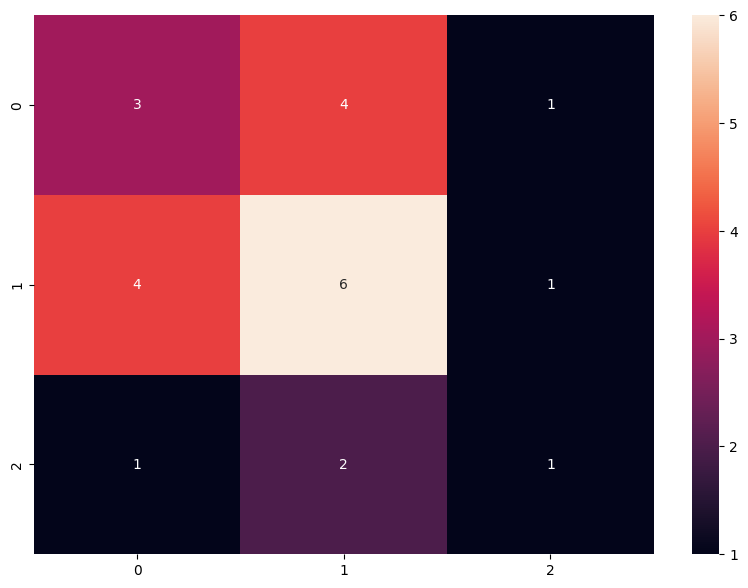

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf_mat[0])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Построение **confusion matrix** c готовой функцией библиотеки [sklearn](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html)

In [14]:
y_true = np.array([0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0,1,0,0])
y_pred = np.array([0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,0,1,0,1])

In [15]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_mat = confusion_matrix(y_true, y_pred)

print(cf_mat)

[[12  4]
 [ 5 16]]


### Accuracy (точность)
Отношение числа всех верных предсказаний к общему числу предсказаний:

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_accuracy.png" width=600>

$$
accuracy = \frac{TP + TN}{TF + FP + FN + TN }
$$

### Precision (специфичность)
Отношение истинного числа элементов данного класса к числу всех предсказаний элементов данного класса. 
**1 - Р** = как много "мусора" модель собирает (т.е. ложных классификаций данного класса)

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_precision.png" width=600>

$$
precision = \frac{TP}{TP + FP}
$$

### Recall (sensivity) - полнота (чувствительность)
Отношение истинного числа элементов данного класса к числу элементов, которые ДОЛЖНЫ быть классифицированы в данный класс
**1 - R** = как много пропусков модель делает
<img src='https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_recall.png' width=600>

$$
recall = \frac{TP}{TP + FN}
$$

 ### F1-Score
Гармоническое среднее, сбалансированно представляющее **P** и **R**:

$$
F_1 score = \frac{2 TP}{2TP + FP + FN}
$$

Значимость P и R зависит от домена (конкретной задачи), т.е. избегаем наиболее критичный тип ошибок. **F<sub>β</sub>-Score**: взвешенная по значимости P и R версия F1-Score:

$$
F_1β score = \frac{(1 + β^2)TP}{(1 + β^2)TP + β^2FP + FN}
$$

- **β = 2** (обычно употребляется) - больше значение R,
- **β = 0.5** (обычно употребляется) - больше занчение P

## 2. Многоклассовые задачи

### 2.1 Accuracy (тоже что и в бинарной классификации)
Та же метрика, однако проблема стала сложнее: такая метрика является слишком общей, кроме того чувствительна к **дисбалансу классов** (а в многоклассовых задачах это обычное явление!)

 ### 2.2 Multiclass confusion matrix
 Матрицу ошибок можно (и нужно!) строить и для мультиклассовых задач. Идеальный баланс классов - редкость, необходимо **нормализовать значения** перед построением мтарицы.


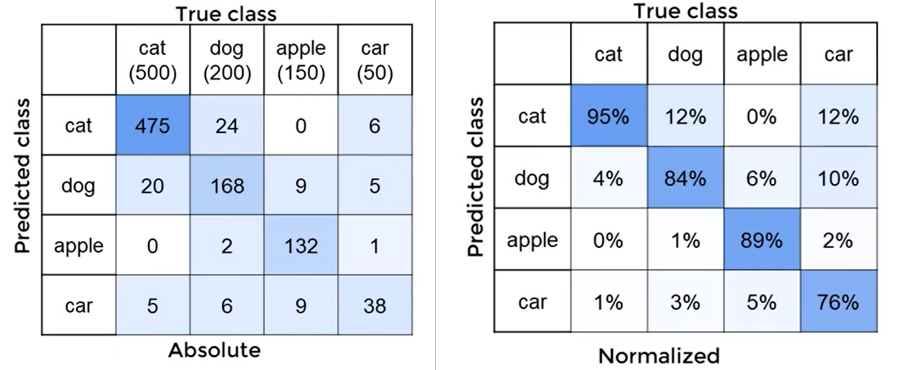


### 2.3 Top-1 и Top-5 accuracy
ImageNet Large Scale Visual Recognition Challenge [(ILSVRC)](https://www.image-net.org/challenges/LSVRC/): более 1,2 млн изображений, 1000 классов

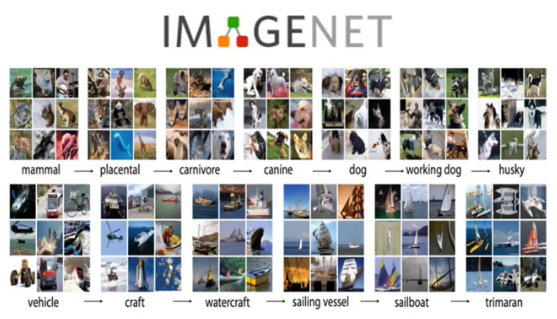

- **top-1 accuracy**: то же что и обычная accuracy: вероне предсказание это предсказание сети (класс с наибольшим probabilty score) == истинному классу (ground truth). Top-1 acc: число верных предсказаний / число всех предсказаний модели
- **top-5 accuracy**: вероне предсказание это предсказание сети когда среди 5 классов с наибольшим probabilty score есть истинныцй класс (ground truth). Top-5 acc: число верных предсказаний / число всех предсказаний модели.

### Учет confidence score (доверительного порога)
Классификатор обычно выдает предсказание, которое после прохождения softmax интерпретируется как вероятности принадлежности данного объекта к данному классу (тензор значений от 0 до 1, составляющих в сумме 1). Т.е. можно задавать некий порог отсечения или порог доверия (confidence score), ниже которого все предсказания буду считаться некорректными. Например такой порог часто по умолчанию ставят 0.5 - тогда все предсказания классов дял данного объекта, со значениями ниже 0.5 будут отбрасываться как сомнительные, рассматриваться будут только от 0.5 и выше.

### 2.4 ROC (recieving operator curve)
Кривая результатов модели в координатах **true positive rate** == Recall (R) - по Y и **false positive rate** (числа ложноположительных классификаций) по Х, построенная по точкам, соответсвующим нескольким (многим) различным значениям порогов confidence для данной модели (например по трем точкам: 0.5, 0.75 и 0.95 или по всем значениям от 0.5 до 0.95 с шагом в 0.05). Чем больше значений confidence, тем точнее кривая как характеристика качества модели.

\begin{align}
TPR (recall) &= \frac{TP}{TP + FN} \\
FPR &= \frac{FP}{FP + TN} \\
\end{align}

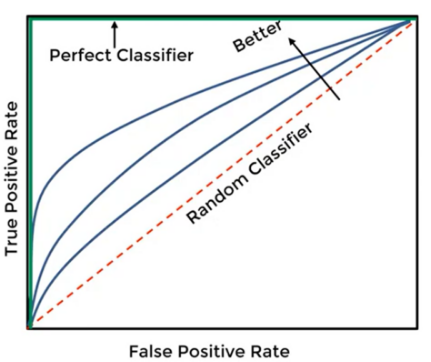


### AUC (area under curve)
Агрегированная по нескольким порогам метрика для оценки качества конкретной модели: занчение площади под кривой ROC:

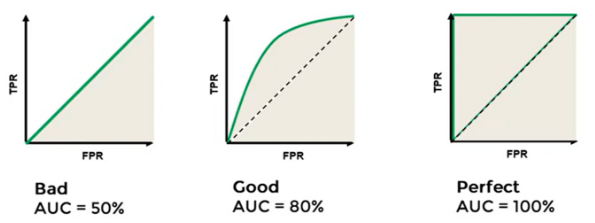

- Плошадь под кривой = 0.5 (50%) - классификатор не превосходит от случайного выбора
- Площадь под кривой = 1 - идеальный (теоретически возможныйц) классификаитор - не существует!
- Реальные обученные классификаторы: от 0.6 до 0.99

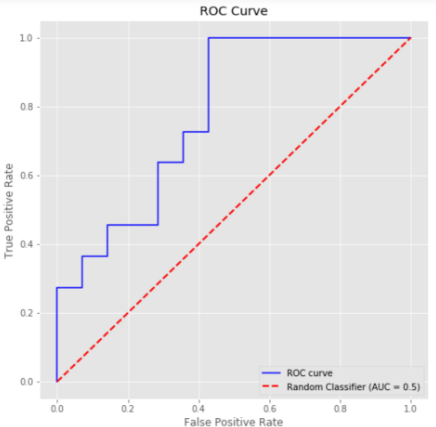

### 2.5 АP и mAP

 Вариант метрики был представлен в [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/) challenge. Выше пример только одного изображения и случай 1 одного класса.
- Average Precision (AP): усредненная по нескольким (многим) значениям confidence кривая для классификации конкретного класса конкретной моделью

В соответствии с [The PASCAL Visual Object Classes (VOC) Challenge](http://homepages.inf.ed.ac.uk/ckiw/postscript/ijcv_vol09.pdf), АР точность по 11 confidence-интервалам  шагом 0.05 (0, 0.05, 0.1...) будет определяться так:

$$
\text{AP} = \frac{1}{11}_{r\in{\{0, 0.1,...,1\}}}\sum{p_{\text{interp}}(r)}
$$

Таким образом, AP суммирует интерполированные точности в 11 точках от 0 до 1 

- Mean Average Precision (mAP),  "средне-усредненная" точность: Обобщение (усреднение) АР для нескольких (многих) классов в мультиклассовых задачах: усредняем АР (кривые) по каждому классу - строим среднюю. Т.е. первое усреднение - по порогам confidence для каждого класса, второе - уже по классам в многоклассовой задаче

## 3. Метрики качетсва обнаружения / сегментации

Типовые задачи компьютерного зрения для в домене БАС:
- классификация изображений (присовение метки класса целому изображению)
- **обнаружение == детекция объектов (локализация на изображении в пределах ограничивающей рамки - bounding box + классификация)**
- сегементация объектов или фона (локализация на изображении в пределах попиксельного контура-маски - segmentation mask + классификация)
- отслеживание объектов по видео (tracking - для каждого объекта относительные координаты на каждом кадре + классификация)

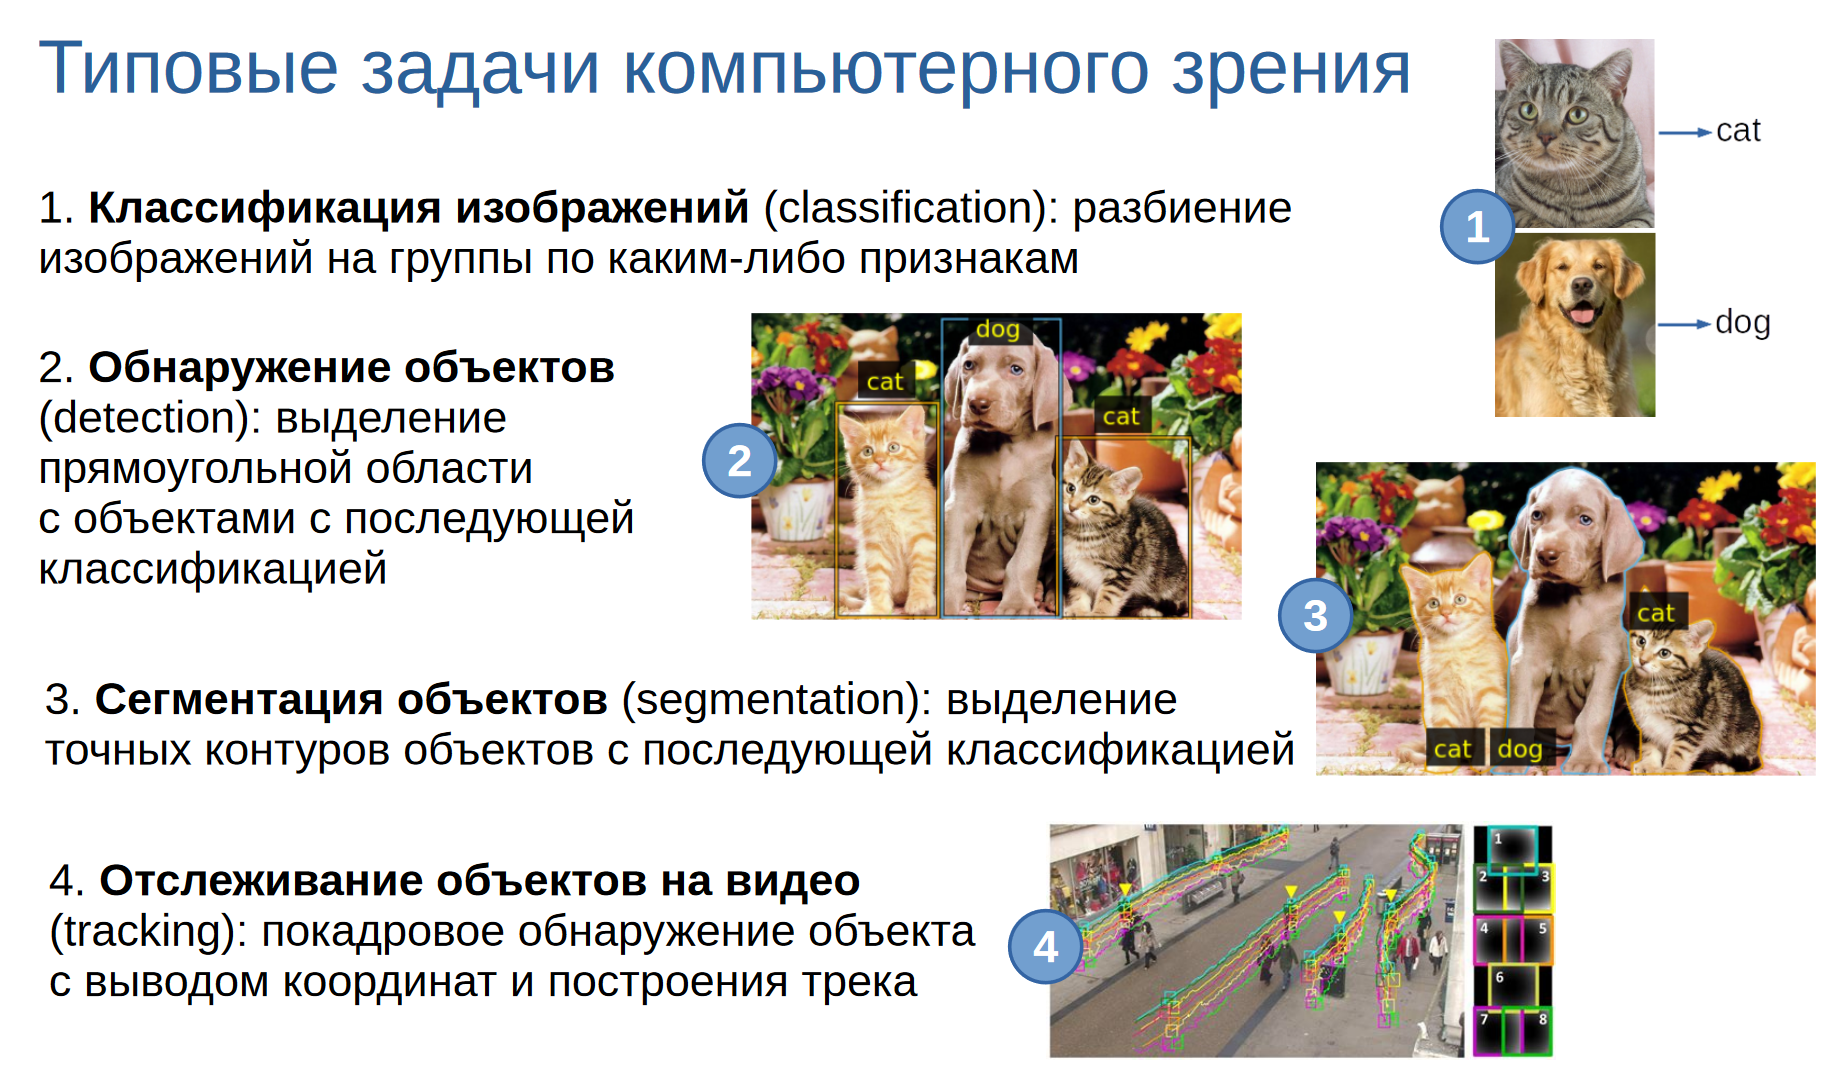

### IoU (Intersection over Union)
Задача **обнаружения (детекции)** включает две подзадачи: примерную локализацию объекта и его классификацию, соответственно для этой задачи необходимо объедиенное рассмотрение метрик каждой подзадачи. Решение начинается всегда с примерной **локализации объекта** (предсказания ограничивающегро прямоугольника - т.н. bounding box, или bbox) и только потом для локализованного объекта реализуется задача классификации. Для оценки точности локализации используетя метрика IoU (Intersection over Union - Пересечение к Объединению). Суть: оценка совпадений истинной bbox и предсказанной по отношению пересечения и объединения их площадей:

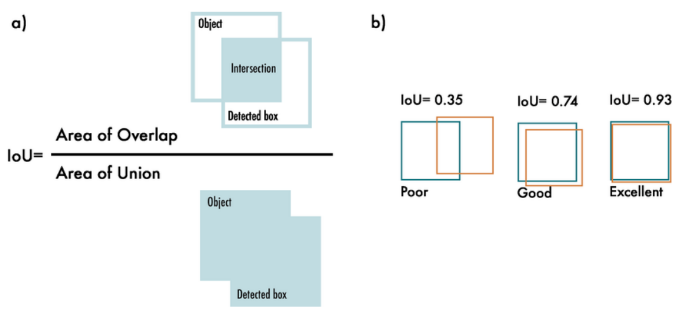

Для IoU также обычно подбирается порог confidence (условно базовый уровень, часто по умолчанию = **0.5**). Это фильтр всех предсказаний - те, для которых IoU < conf<sub>IoU</sub> отбрасыавются как ненадежные, для которых IoU > conf<sub>IoU</sub> будут оцениваться далее метриками (многоклассовой) классификации.

 # Пример вывода метрик
 Обнаружение по снимкам с БПЛА, модель архитектуры YOLO 8, детекция с 4 классами:
 - медведи (bear)
 - яки (ox)
 - бочки (barrel)
 - древесина (wood)
 
## 1. Общие метрики классификации:

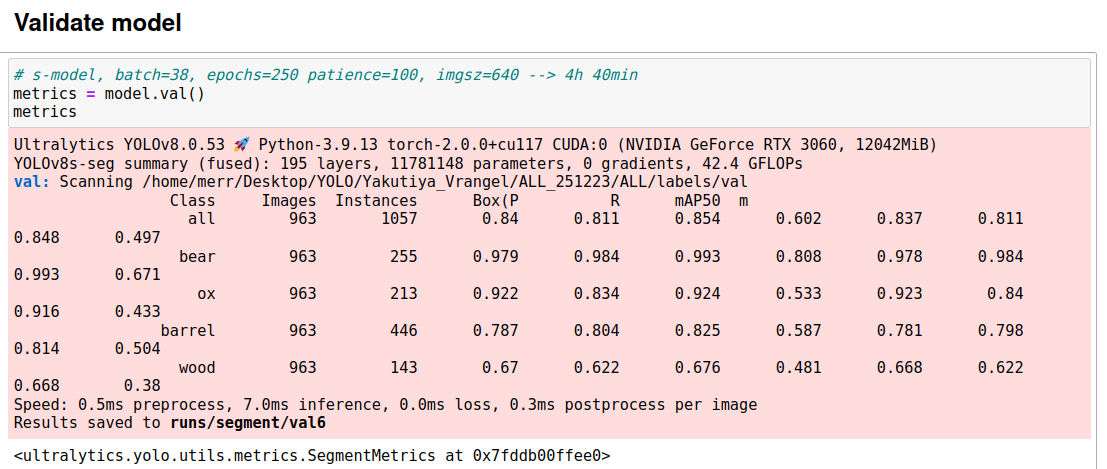

## 2. Матрица ошибок

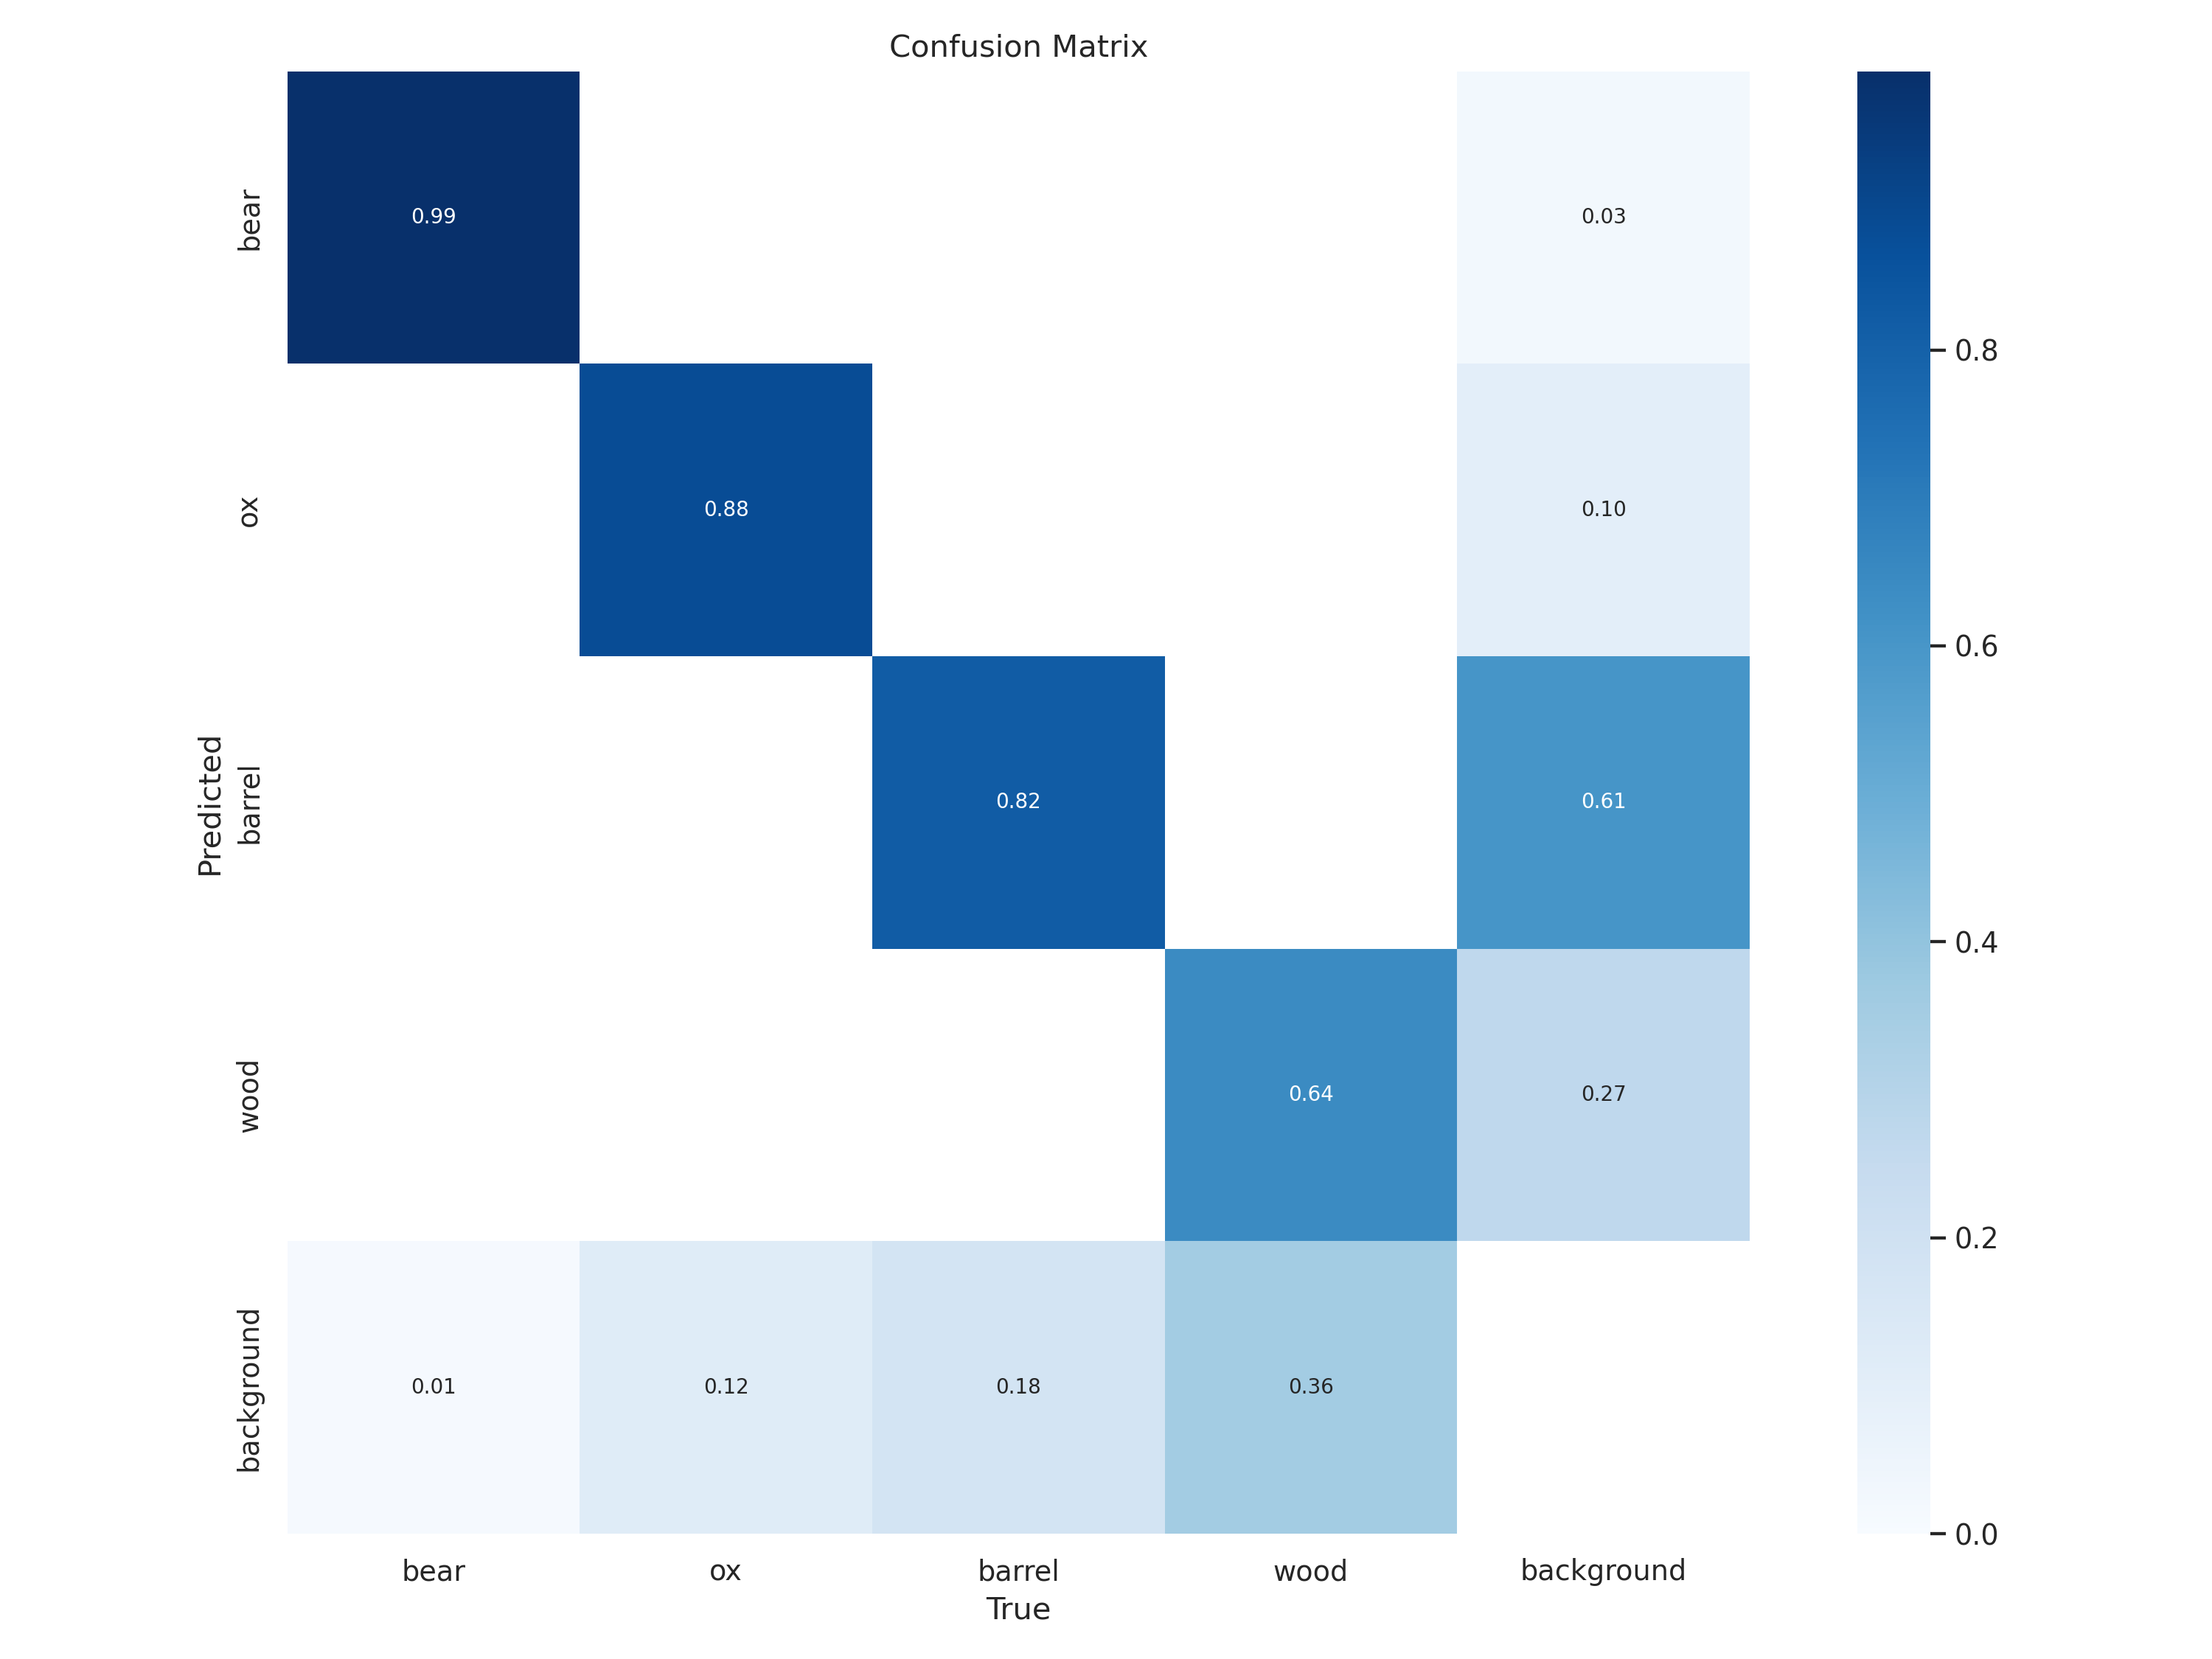

## 3. Кривые mAP50*
*оси графика транспонированы по отношению к предыдущим примерам

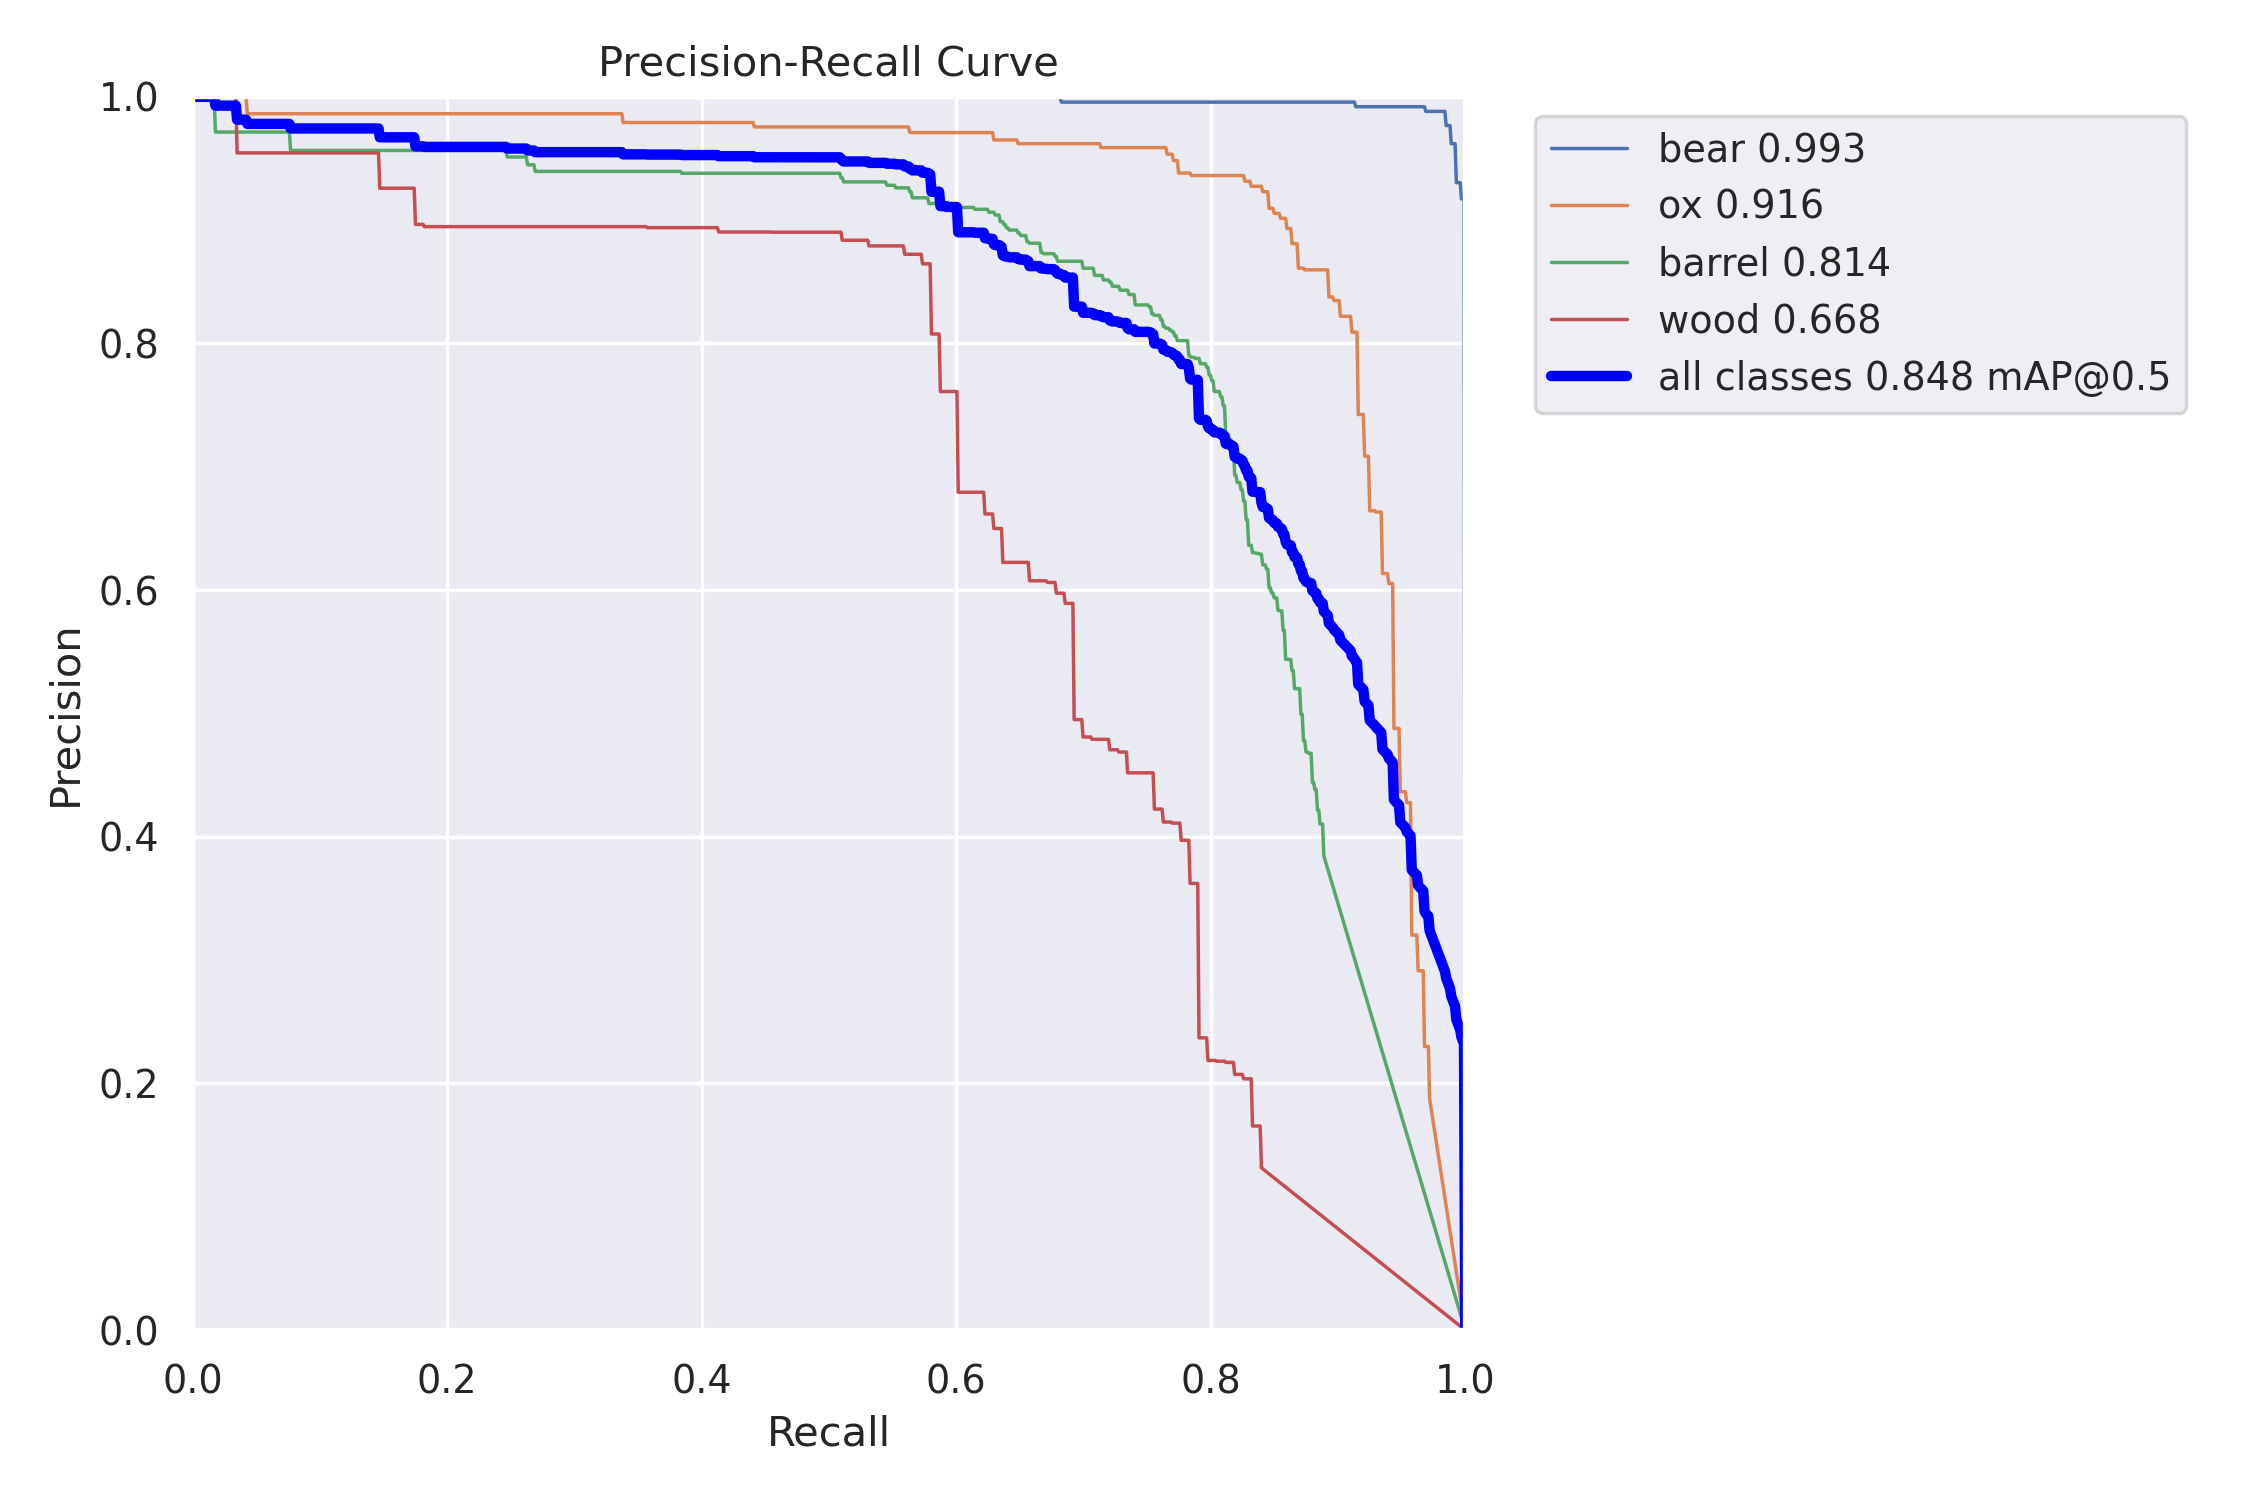

## Особенность оценки случаев как TP, FP, TN, FN в задачах детекции
1. True Positive (TP): Предсказание с IoU ≥ conf<sub>IoU</sub> (правильно определило его локализацию), которое при этом правильно определило также класс объекта.
1. False Positive (FP): 
    - Предсказание, которое имеет IoU < conf<sub>IoU</sub> (ошибка на стадии локализации),
    - IoU ≥ conf<sub>IoU</sub>, но неправильно определен класс объекта, 
    - предсказан объект, которого нет.
1. False Negative (FN): Реальный объект, который модель не смогла обнаружить.